In [1]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib qt

In [3]:
fname = '/Users/idohaber/Desktop/PEDS_OSA/008_Resampled_sleep_zapline_N2N3_clean.set'
raw = mne.io.read_raw_eeglab(fname,preload=True)
data = raw.get_data(units="uV")

/Users/idohaber/PEDS_OSA/spindles/lib/python3.9/site-packages/pymatreader/utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Reading /Users/idohaber/Desktop/PEDS_OSA/008_Resampled_sleep_zapline_N2N3_clean.fdt
Reading 0 ... 3654694  =      0.000 ... 18273.470 secs...


/Users/idohaber/PEDS_OSA/spindles/lib/python3.9/site-packages/pymatreader/utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(
/var/folders/64/7tq575ss6rl3jlt3g5syvl6w0000gn/T/ipykernel_77834/1358121990.py:2: RuntimeWarning: Limited 7 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname,preload=True)
/var/folders/64/7tq575ss6rl3jlt3g5syvl6w0000gn/T/ipykernel_77834/1358121990.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname,preload=True)


In [4]:

channel = raw.info['ch_names']
sf = raw.info['sfreq']
print(data.shape, sf, channel)

(172, 3654695) 200.0 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '83', '84', '85', '86', '87', '88', '89', '90', '95', '96', '97', '98', '99', '100', '101', '106', '107', '108', '109', '110', '115', '116', '117', '118', '119', '124', '125', '126', '127', '128', '129', '130', '131', '132', '137', '138', '139', '140', '141', '142', '143', '144', '149', '150', '151', '152', '153', '154', '155', '159', '160', '161', '162', '163', '164', '169', '170', '171', '172', '173', '178', '179', '180', '181', '182', '183', '184', '185', '186', '191', '192', '193', '194', '195', '196', '197', 

In [5]:
# Plot and save the 2D sensor layout
fig_2d = raw.plot_sensors(kind='topomap', show_names=True, show=False)
plt.savefig('sensor_layout_2d.png', dpi=300, bbox_inches='tight')
plt.close()


In [6]:
# Run spindle detection on all channels (entire net) with 10-16Hz range
sp = yasa.spindles_detect(data, sf, ch_names=channel, multi_only=False, 
                         freq_sp=(10, 16))

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   20.7s
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   16.1s
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:   17.3s finished


In [7]:
# Get detailed information about all detected spindles
df = sp.summary()  # general summary for each spindle
print(f"Total spindles detected: {len(df)}")
print(f"Average spindle duration: {df['Duration'].mean():.3f} seconds")
print(f"Average spindle amplitude: {df['Amplitude'].mean():.3f} μV")
print("\nFull spindle dataframe:")
df  # Inspect the dataframe

Total spindles detected: 17639
Average spindle duration: 0.836 seconds
Average spindle amplitude: 52.665 μV

Full spindle dataframe:


,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,2809.485,2809.625,2810.135,0.650,52.460115,11.940807,2.075679,0.253981,10.665348,7.0,0.213740,1,0
1,2971.370,2971.490,2972.040,0.670,56.436887,12.303998,2.191266,0.311711,11.033796,8.0,0.177778,1,0
2,3103.970,3104.320,3104.490,0.520,47.501141,9.346159,1.918484,0.325131,11.762560,7.0,0.666667,1,0
3,3146.025,3146.435,3146.765,0.740,36.597265,8.602693,1.820361,0.286591,11.754473,8.0,0.550336,1,0
4,3217.315,3217.850,3218.100,0.785,70.219406,13.497738,1.936988,0.263220,12.006709,9.0,0.677215,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,17391.790,17392.025,17392.370,0.580,93.616025,19.720820,2.445739,0.244900,11.745549,6.0,0.401709,224,171
17635,17434.040,17434.425,17435.460,1.420,90.586429,17.105128,2.303405,0.308926,11.227799,16.0,0.270175,224,171
17636,17438.970,17439.220,17439.845,0.875,79.524716,18.449294,2.322695,0.330509,11.061836,8.0,0.284091,224,171
17637,17532.580,17533.035,17533.465,0.885,90.739225,19.121853,2.659666,0.426581,11.207959,10.0,0.511236,224,171


In [8]:
# Get summary statistics per channel
channel_summary = sp.summary(grp_chan=True)
print("Spindles detected per channel:")
print(channel_summary)

# Save channel summary to CSV
channel_summary.to_csv('spindles_per_channel_summary.csv')

# Create a bar plot of spindles per channel
plt.figure(figsize=(15, 6))
channel_summary['Count'].plot(kind='bar')
plt.title('Number of Spindles Detected per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Spindles')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('spindles_per_channel_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Save channel statistics to text file
with open('channel_statistics.txt', 'w') as f:
    f.write("Spindle Statistics per Channel\n")
    f.write("============================\n\n")
    f.write(f"Total number of channels analyzed: {len(channel_summary)}\n")
    f.write(f"Average spindles per channel: {channel_summary['Count'].mean():.2f}\n")
    f.write(f"Maximum spindles in a channel: {channel_summary['Count'].max():.0f}\n")
    f.write(f"Minimum spindles in a channel: {channel_summary['Count'].min():.0f}\n")
    f.write(f"Standard deviation: {channel_summary['Count'].std():.2f}\n")


Spindles detected per channel:
         Count  Duration  Amplitude        RMS  AbsPower  RelPower  Frequency  \
Channel                                                                         
1           43  0.826628  45.596833   9.911486  1.881062  0.298615  11.804791   
100        120  0.803125  47.325559  10.392035  1.915056  0.297763  11.961576   
101         39  0.698462  42.265459   9.395664  1.859460  0.287844  11.919367   
106         32  0.689844  52.408006  11.707879  2.046438  0.317115  11.211126   
107         30  0.719167  53.299930  11.808953  2.087727  0.334848  11.152394   
...        ...       ...        ...        ...       ...       ...        ...   
95          34  0.704265  46.014396  10.025498  1.916319  0.300835  11.467679   
96          33  0.699848  43.969695   9.782298  1.892807  0.303365  11.182439   
97          29  0.722241  41.169101   9.012421  1.762638  0.299237  11.078489   
98          30  0.743667  36.239902   8.223394  1.683721  0.277546  11.642254 

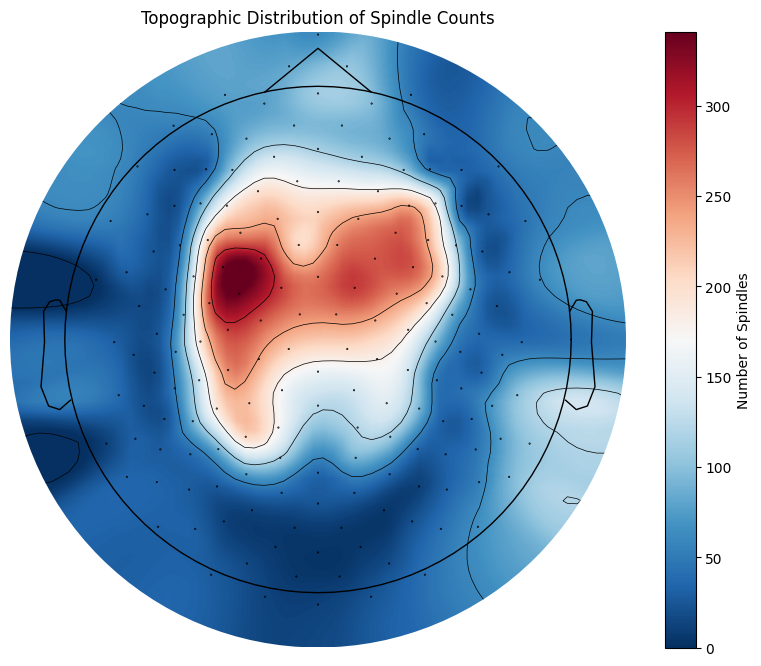

In [9]:

# Plot average spindle across all channels
%matplotlib inline

# Create data array matching the channels in raw.info
data_for_topomap = np.zeros(len(raw.ch_names))
ch_names = raw.ch_names
for ch in channel_summary.index:
    if ch in ch_names:
        idx = ch_names.index(ch)
        data_for_topomap[idx] = channel_summary.loc[ch, 'Count']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the topomap
im, cm = mne.viz.plot_topomap(data_for_topomap,
                             raw.info,
                             cmap='RdBu_r',
                             sensors=True,
                             show=False,
                             axes=ax)

# Add colorbar to the same figure
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Number of Spindles')

# Add title
ax.set_title('Topographic Distribution of Spindle Counts')

# Save and show the plot
plt.savefig('spindle_topographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Save the topomap data for future reference
np.save('spindle_topographic_data.npy', data_for_topomap)


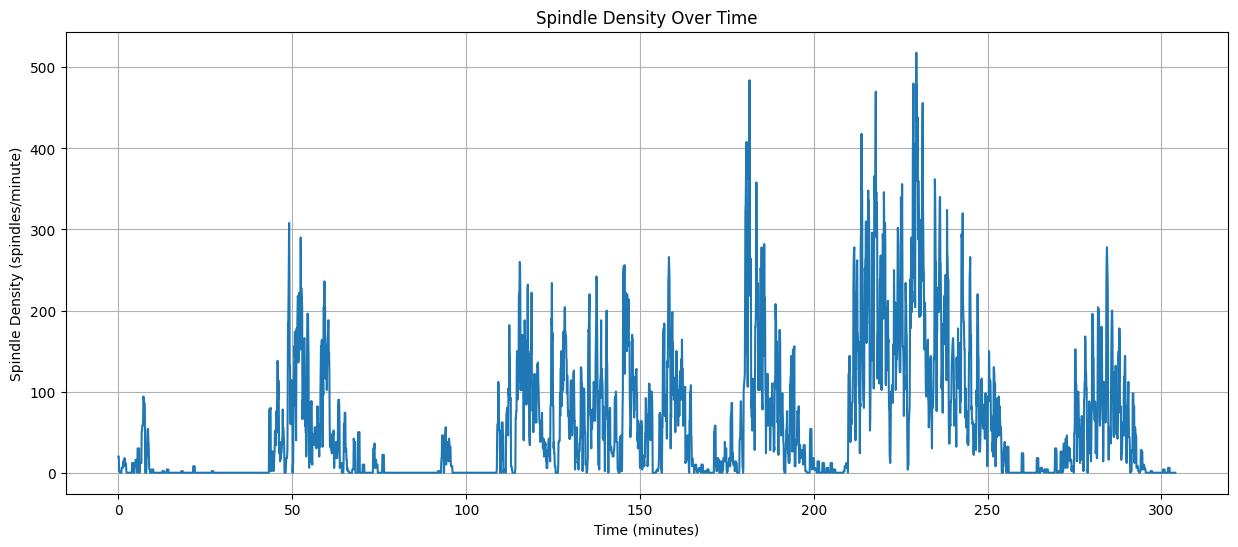

Spindle Analysis Summary

Temporal Statistics:
------------------
Average spindle density: 57.99 spindles/minute
Peak spindle density: 518.00 spindles/minute
Total recording duration: 304.56 minutes

Spindle Characteristics:
----------------------
Total spindles detected: 17639
Mean spindle duration: 0.836 ± 0.298 seconds
Mean spindle amplitude: 52.665 ± 17.847 μV
Mean spindle frequency: 11.617 ± 0.632 Hz



In [10]:
# Calculate spindle density over time
window_size = 30  # Window size in seconds
step_size = 5    # Step size in seconds
total_duration = len(data[0]) / sf  # Total duration in seconds

# Create time windows
windows = np.arange(0, total_duration - window_size, step_size)
density = []

# Calculate density for each window
for start in windows:
    start_idx = int(start * sf)
    end_idx = int((start + window_size) * sf)
    
    # Count spindles in this window
    window_spindles = df[
        (df['Start'] >= start) & 
        (df['Start'] < (start + window_size))
    ].shape[0]
    
    # Calculate density (spindles per minute)
    density.append(window_spindles * (60 / window_size))

# Save density data
density_df = pd.DataFrame({
    'Time_minutes': windows / 60,
    'Density_per_minute': density
})
density_df.to_csv('spindle_density_over_time.csv', index=False)

# Plot spindle density over time
plt.figure(figsize=(15, 6))
plt.plot(windows / 60, density)  # Convert time to minutes
plt.xlabel('Time (minutes)')
plt.ylabel('Spindle Density (spindles/minute)')
plt.title('Spindle Density Over Time')
plt.grid(True)
plt.savefig('spindle_density_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Save detailed spindle information
df.to_csv('all_spindles_detailed.csv', index=False)

# Calculate and save statistics
stats_text = f"""Spindle Analysis Summary
=====================

Temporal Statistics:
------------------
Average spindle density: {np.mean(density):.2f} spindles/minute
Peak spindle density: {np.max(density):.2f} spindles/minute
Total recording duration: {total_duration/60:.2f} minutes

Spindle Characteristics:
----------------------
Total spindles detected: {len(df)}
Mean spindle duration: {df['Duration'].mean():.3f} ± {df['Duration'].std():.3f} seconds
Mean spindle amplitude: {df['Amplitude'].mean():.3f} ± {df['Amplitude'].std():.3f} μV
Mean spindle frequency: {df['Frequency'].mean():.3f} ± {df['Frequency'].std():.3f} Hz
"""

with open('spindle_analysis_summary.txt', 'w') as f:
    f.write(stats_text)

print(stats_text)


In [ ]:
# 1. Simple Spindle Overlay Plot
# Get a good example spindle (one of the highest amplitude ones)
example_spindle = df.sort_values('Amplitude', ascending=False).iloc[0]
ch_idx = example_spindle['IdxChannel']

# Get data around the spindle with context
margin = int(2 * sf)  # 2 seconds margin
start_sample = int(example_spindle['Start'] * sf) - margin
end_sample = int(example_spindle['End'] * sf) + margin

# Get data using MNE raw object to ensure correct format
eeg_data = raw.get_data(units="uV")
print(f"Data shape: {eeg_data.shape}")
print(f"Channel index: {ch_idx}, Start: {start_sample}, End: {end_sample}")

# Make sure we don't go out of bounds
start_sample = max(0, start_sample)
end_sample = min(eeg_data.shape[1], end_sample)

# Extract the data
raw_signal = eeg_data[ch_idx, start_sample:end_sample]
time = np.arange(start_sample, end_sample) / sf

# Create the plot
plt.figure(figsize=(15, 8))

# Find the indices for the spindle region within our time window
spindle_start_idx = int((example_spindle['Start'] - time[0]) * sf)
spindle_end_idx = int((example_spindle['End'] - time[0]) * sf)

# Make sure indices are within bounds
spindle_start_idx = max(0, spindle_start_idx)
spindle_end_idx = min(len(time), spindle_end_idx)

# Plot the signal in segments
# Before spindle (black)
if spindle_start_idx > 0:
    plt.plot(time[:spindle_start_idx], raw_signal[:spindle_start_idx], 
             'k', linewidth=1, label='Raw EEG')

# During spindle (red)
if spindle_end_idx > spindle_start_idx:
    plt.plot(time[spindle_start_idx:spindle_end_idx], 
             raw_signal[spindle_start_idx:spindle_end_idx], 
             'r', linewidth=2, label='Detected Spindle')

# After spindle (black)
if spindle_end_idx < len(time):
    plt.plot(time[spindle_end_idx:], raw_signal[spindle_end_idx:], 
             'k', linewidth=1)

# Mark the peak of the spindle
plt.axvline(example_spindle['Peak'], color='red', linestyle='--', 
            linewidth=1, alpha=0.7, label='Spindle Peak')

plt.title(f'Detected Spindle - Channel {example_spindle["Channel"]}\n'
          f'Frequency: {example_spindle["Frequency"]:.1f} Hz, '
          f'Duration: {example_spindle["Duration"]*1000:.0f} ms, '
          f'Amplitude: {example_spindle["Amplitude"]:.1f} μV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.legend()
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig('reports/assets/June_25/spindle_overlay.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Displayed spindle from channel {example_spindle['Channel']} at time {example_spindle['Start']:.1f}s")


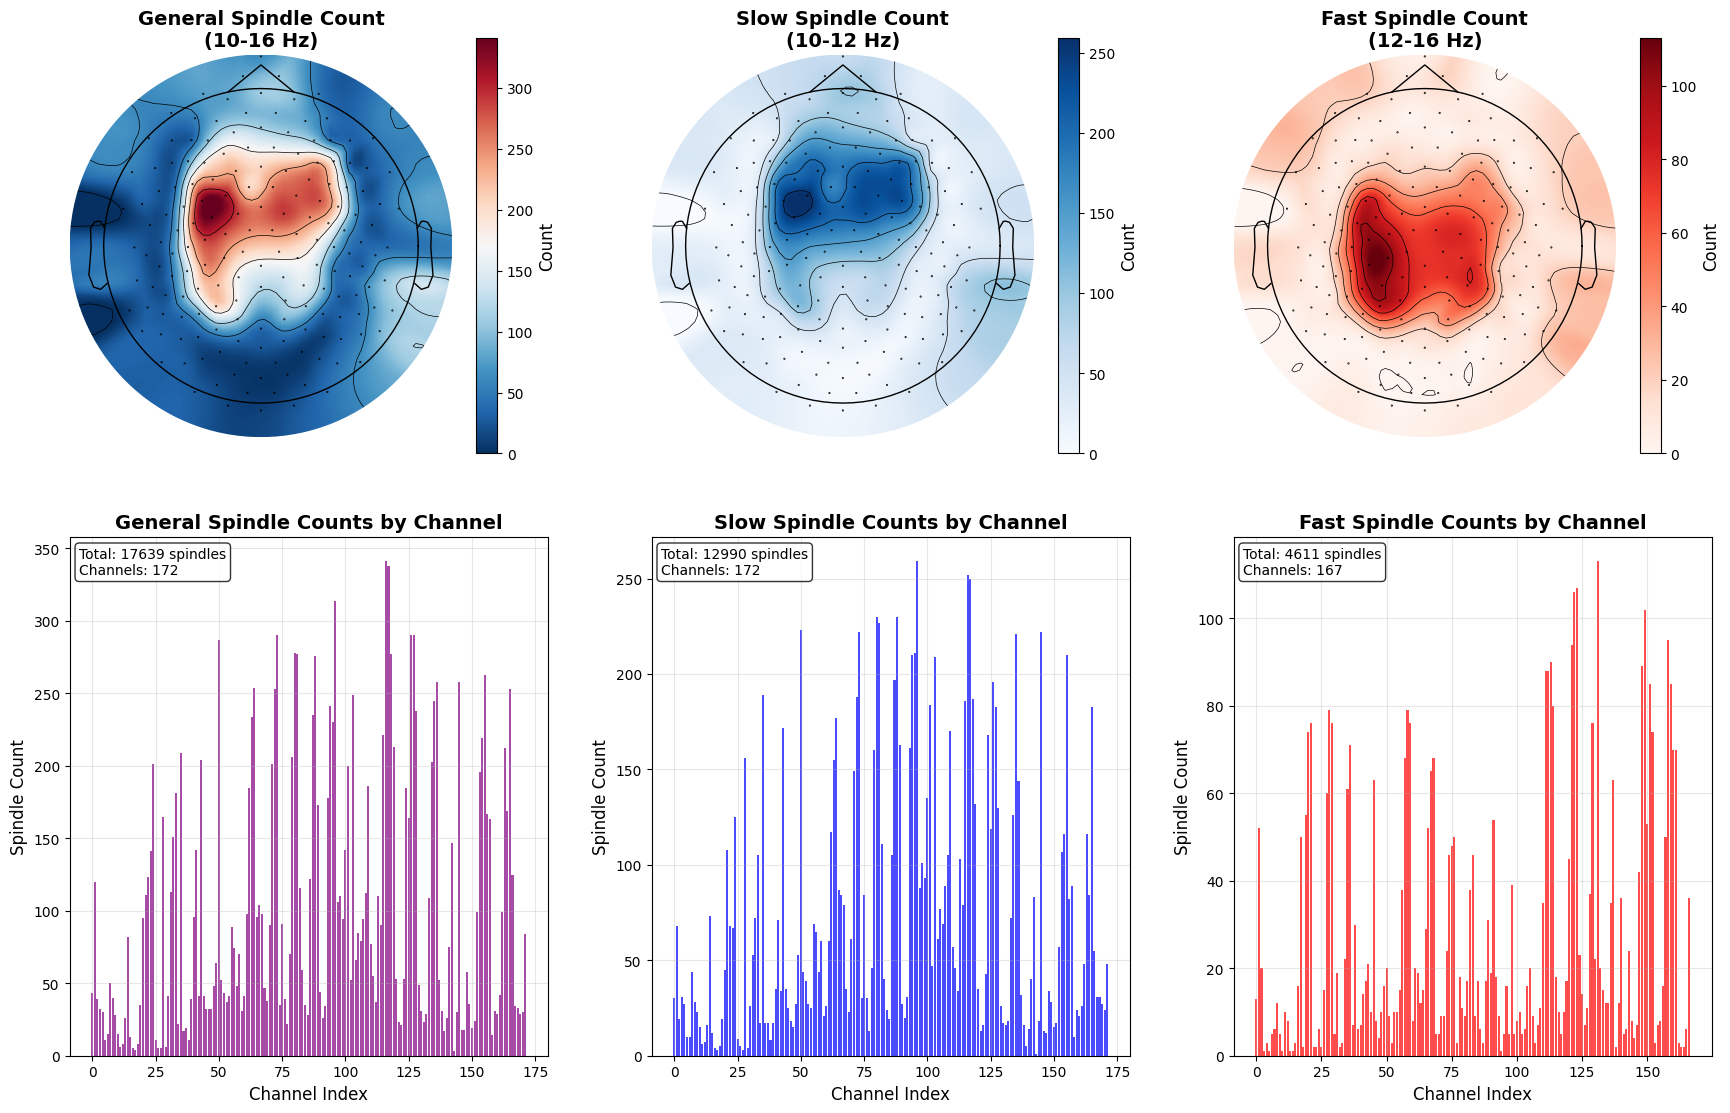


COMPREHENSIVE SPINDLE ANALYSIS SUMMARY
Detection Range: 10-16 Hz
Slow Spindles: 10-12 Hz | Fast Spindles: 12-16 Hz
------------------------------------------------------------
Total Spindles: 17,639
  - Slow (10-12 Hz): 12,990 (73.6%)
  - Fast (12-16 Hz): 4,611 (26.1%)
------------------------------------------------------------
Channels with spindles:
  - Any spindle: 172
  - Slow spindles: 172
  - Fast spindles: 167
------------------------------------------------------------
Average frequency: 11.62 ± 0.63 Hz
  - Slow spindles: 11.36 ± 0.47 Hz
  - Fast spindles: 12.35 ± 0.40 Hz


In [12]:
# Create comprehensive 2x3 visualization: Topographic maps (top) and Channel counts (bottom)
%matplotlib inline

# Function to create topomap data for any channel summary
def create_topomap_data(channel_summary, raw_info):
    """Create data array for topographic mapping"""
    data_for_topomap = np.zeros(len(raw_info['ch_names']))
    ch_names = raw_info['ch_names']
    
    for ch in channel_summary.index:
        if ch in ch_names:
            idx = ch_names.index(ch)
            data_for_topomap[idx] = channel_summary.loc[ch, 'Count']
    
    return data_for_topomap

# Create topomap data for each spindle type
topomap_all = create_topomap_data(channel_summary_all, raw.info)
topomap_slow = create_topomap_data(channel_summary_slow, raw.info)
topomap_fast = create_topomap_data(channel_summary_fast, raw.info)

# Create the main figure with 2 rows and 3 columns
fig = plt.figure(figsize=(18, 12))

# Top row: Topographic maps
# 1. General spindle topographic map
ax1 = plt.subplot(2, 3, 1)
im1, cm1 = mne.viz.plot_topomap(topomap_all, raw.info, cmap='RdBu_r', 
                                sensors=True, show=False, axes=ax1)
ax1.set_title('General Spindle Count\n(10-16 Hz)', fontsize=14, fontweight='bold')
cbar1 = fig.colorbar(im1, ax=ax1, shrink=0.8)
cbar1.set_label('Count', fontsize=12)

# 2. Slow spindle topographic map  
ax2 = plt.subplot(2, 3, 2)
im2, cm2 = mne.viz.plot_topomap(topomap_slow, raw.info, cmap='Blues', 
                                sensors=True, show=False, axes=ax2)
ax2.set_title('Slow Spindle Count\n(10-12 Hz)', fontsize=14, fontweight='bold')
cbar2 = fig.colorbar(im2, ax=ax2, shrink=0.8)
cbar2.set_label('Count', fontsize=12)

# 3. Fast spindle topographic map
ax3 = plt.subplot(2, 3, 3)
im3, cm3 = mne.viz.plot_topomap(topomap_fast, raw.info, cmap='Reds', 
                                sensors=True, show=False, axes=ax3)
ax3.set_title('Fast Spindle Count\n(12-16 Hz)', fontsize=14, fontweight='bold')
cbar3 = fig.colorbar(im3, ax=ax3, shrink=0.8)
cbar3.set_label('Count', fontsize=12)

# Bottom row: Channel count bar plots
# 4. General spindle channel counts
ax4 = plt.subplot(2, 3, 4)
channels_with_spindles = channel_summary_all[channel_summary_all['Count'] > 0]
ax4.bar(range(len(channels_with_spindles)), channels_with_spindles['Count'], 
        color='purple', alpha=0.7)
ax4.set_title('General Spindle Counts by Channel', fontsize=14, fontweight='bold')
ax4.set_xlabel('Channel Index', fontsize=12)
ax4.set_ylabel('Spindle Count', fontsize=12)
ax4.grid(True, alpha=0.3)
# Add text showing total
ax4.text(0.02, 0.98, f'Total: {int(channels_with_spindles["Count"].sum())} spindles\n'
                      f'Channels: {len(channels_with_spindles)}', 
         transform=ax4.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. Slow spindle channel counts
ax5 = plt.subplot(2, 3, 5)
channels_with_slow = channel_summary_slow[channel_summary_slow['Count'] > 0]
ax5.bar(range(len(channels_with_slow)), channels_with_slow['Count'], 
        color='blue', alpha=0.7)
ax5.set_title('Slow Spindle Counts by Channel', fontsize=14, fontweight='bold')
ax5.set_xlabel('Channel Index', fontsize=12)
ax5.set_ylabel('Spindle Count', fontsize=12)
ax5.grid(True, alpha=0.3)
# Add text showing total
ax5.text(0.02, 0.98, f'Total: {int(channels_with_slow["Count"].sum())} spindles\n'
                      f'Channels: {len(channels_with_slow)}', 
         transform=ax5.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. Fast spindle channel counts
ax6 = plt.subplot(2, 3, 6)
channels_with_fast = channel_summary_fast[channel_summary_fast['Count'] > 0]
ax6.bar(range(len(channels_with_fast)), channels_with_fast['Count'], 
        color='red', alpha=0.7)
ax6.set_title('Fast Spindle Counts by Channel', fontsize=14, fontweight='bold')
ax6.set_xlabel('Channel Index', fontsize=12)
ax6.set_ylabel('Spindle Count', fontsize=12)
ax6.grid(True, alpha=0.3)
# Add text showing total
ax6.text(0.02, 0.98, f'Total: {int(channels_with_fast["Count"].sum())} spindles\n'
                      f'Channels: {len(channels_with_fast)}', 
         transform=ax6.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout and save
plt.tight_layout(pad=3.0)
plt.savefig('comprehensive_spindle_analysis_2x3.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("COMPREHENSIVE SPINDLE ANALYSIS SUMMARY")
print("="*60)
print(f"Detection Range: 10-16 Hz")
print(f"Slow Spindles: 10-12 Hz | Fast Spindles: 12-16 Hz")
print("-"*60)
print(f"Total Spindles: {len(df):,}")
print(f"  - Slow (10-12 Hz): {len(df_slow):,} ({len(df_slow)/len(df)*100:.1f}%)")
print(f"  - Fast (12-16 Hz): {len(df_fast):,} ({len(df_fast)/len(df)*100:.1f}%)")
print("-"*60)
print(f"Channels with spindles:")
print(f"  - Any spindle: {len(channels_with_spindles)}")
print(f"  - Slow spindles: {len(channels_with_slow)}")
print(f"  - Fast spindles: {len(channels_with_fast)}")
print("-"*60)
print(f"Average frequency: {df['Frequency'].mean():.2f} ± {df['Frequency'].std():.2f} Hz")
print(f"  - Slow spindles: {df_slow['Frequency'].mean():.2f} ± {df_slow['Frequency'].std():.2f} Hz")
print(f"  - Fast spindles: {df_fast['Frequency'].mean():.2f} ± {df_fast['Frequency'].std():.2f} Hz")
print("="*60)
